# Best Model

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the saved model
model = load_model('model2.keras')

In [8]:
# Directory paths
train_dir = 'D:/GoPlants/dataset/train'
validation_dir = 'D:/GoPlants/dataset/validation'
test_dir = 'D:/GoPlants/dataset/test'

In [9]:
# Parameters
img_height, img_width = 150, 150
batch_size = 32

# Data augmentation for training set with enhanced parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,           # Increased rotation range for more variety
    width_shift_range=0.3,       # Increased width shift
    height_shift_range=0.3,      # Increased height shift
    shear_range=0.3,             # Increased shear range
    zoom_range=0.3,              # Increased zoom range
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data normalization for validation and test sets
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Validation generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 23972 images belonging to 30 classes.
Found 3030 images belonging to 30 classes.
Found 2998 images belonging to 30 classes.


In [10]:
def load_and_preprocess_image(img_path, img_height, img_width):
    # Load the image
    img = load_img(img_path, target_size=(img_height, img_width))
    
    # Convert to array
    img_array = img_to_array(img)
    
    # Reshape to (1, img_height, img_width, 3) and normalize
    img_array = np.expand_dims(img_array, axis=0) / 255.
    
    return img_array

def classify_plant_image(model, img_path, class_labels):
    # Preprocess the image
    processed_image = load_and_preprocess_image(img_path, img_height, img_width)
    
    # Make predictions
    predictions = model.predict(processed_image)
    
    # Get the index of the predicted class with the highest probability
    predicted_class_index = np.argmax(predictions)
    
    # Get the class label from the index
    predicted_class_label = class_labels[predicted_class_index]
    
    # Get the confidence score for the predicted class
    confidence = predictions[0][predicted_class_index]
    
    # Return the predicted class and confidence
    return predicted_class_label, confidence

In [11]:
def display_prediction(img_path, predicted_class, confidence):
    img = load_img(img_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: aloevera with confidence 0.98


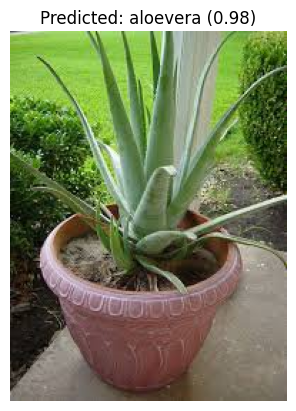

In [14]:
# Example usage
class_labels = list(train_generator.class_indices.keys())  # Class labels from the training data
img_path = 'C:/Users/DELL/Desktop/Testing Images/aloevera2.jpg'  # Path to the new image you want to classify

predicted_class, confidence = classify_plant_image(model, img_path, class_labels)
print(f"Predicted Class: {predicted_class} with confidence {confidence:.2f}")

# Example usage
display_prediction(img_path, predicted_class, confidence)